In [9]:
import joblib
import pandas as pd

# Model Preparation

In [5]:
model = joblib.load("./fixed_friday_training_models/post_fs/stk3.pkl")
model

LGBMClassifier()

In [13]:
xg_model = joblib.load("./fixed_friday_training_models/post_fs/xg.pkl")
rf_model = joblib.load("./fixed_friday_training_models/post_fs/rf.pkl")
lgbm_model = joblib.load("./fixed_friday_training_models/post_fs/lgbm.pkl")

# Test Preparation

In [11]:
fs = ['Total Connection Flow Time', 'Fwd Seg Size Min', 'Bwd RST Flags', 'Fwd Packet Length Max', 'Flow Duration', 'Packet Length Mean', 'Flow IAT Max', 'Fwd Packet Length Mean', 'Average Packet Size', 'Bwd IAT Total', 'Total Length of Bwd Packet', 'Bwd Packets/s', 'Total Length of Fwd Packet', 'Fwd Packets/s', 'Fwd Act Data Pkts', 'Flow Bytes/s', 'Bwd Packet Length Max', 'Bwd Segment Size Avg', 'Flow IAT Min', 'Packet Length Max', 'Fwd Segment Size Avg']

In [42]:
df_test = pd.read_csv('/mnt/extra/datasets/processed/friday_annotated_test_rerun.csv')
X_test = df_test[fs]
y_test = df_test['Label']

In [53]:
df_test

,index,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
0,0,192.168.10.9-205.174.165.73-7917-8080-6,192.168.10.9,7917,205.174.165.73,8080,6,2017-07-07 17:15:21.183058,561,1,...,0.0,0.0,0.0,-1,-1,0,0,0,561,Not Portscan
1,1,192.168.10.15-205.174.165.73-55703-8080-6,192.168.10.15,55703,205.174.165.73,8080,6,2017-07-07 17:15:36.401022,845,1,...,0.0,0.0,0.0,-1,-1,0,0,0,845,Not Portscan
2,2,192.168.10.15-205.174.165.73-55703-8080-6,192.168.10.15,55703,205.174.165.73,8080,6,2017-07-07 17:15:36.914385,777,1,...,0.0,0.0,0.0,-1,-1,0,0,0,777,Not Portscan
3,3,192.168.10.8-205.174.165.73-6257-8080-6,192.168.10.8,6257,205.174.165.73,8080,6,2017-07-07 17:15:37.780193,750,1,...,0.0,0.0,0.0,-1,-1,0,0,0,750,Not Portscan
4,4,192.168.10.8-205.174.165.73-6257-8080-6,192.168.10.8,6257,205.174.165.73,8080,6,2017-07-07 17:15:38.272414,478,1,...,0.0,0.0,0.0,-1,-1,0,0,0,478,Not Portscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65551,65594,172.16.0.1-192.168.10.50-64318-2222-6,172.16.0.1,64318,192.168.10.50,2222,6,2017-07-07 18:09:11.499555,64,1,...,0.0,0.0,0.0,-1,-1,0,0,0,64,Portscan
65552,65595,192.168.10.17-192.168.10.3-8398-53-17,192.168.10.17,8398,192.168.10.3,53,17,2017-07-07 18:12:10.812610,61049,2,...,0.0,0.0,0.0,-1,-1,0,0,0,61049,Not Portscan
65553,65596,172.16.0.1-192.168.10.50-41249-58080-6,172.16.0.1,41249,192.168.10.50,58080,6,2017-07-07 18:08:57.752078,49,1,...,0.0,0.0,0.0,-1,-1,0,0,0,49,Portscan
65554,65597,192.168.10.17-172.217.12.163-51051-443-6,192.168.10.17,51051,172.217.12.163,443,6,2017-07-07 19:56:02.486461,5836914,8,...,0.0,5649155.0,5649155.0,-1,-1,0,0,0,5836914,Not Portscan


In [43]:
X_test = X_test.values

In [44]:
# record the results
xg_test=xg_model.predict(X_test)
xg_prob_test=xg_model.predict_proba(X_test)

rf_test=rf_model.predict(X_test)
rf_prob_test=rf_model.predict_proba(X_test)

lgbm_test=lgbm_model.predict(X_test)
lgbm_prob_test=lgbm_model.predict_proba(X_test)

/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
xg_test

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
xg_test=xg_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
lgbm_test=lgbm_test.reshape(-1, 1)

In [48]:
import numpy as np

top_3_test_predictions = [xg_test, rf_test, lgbm_test]
top_3_test_proba = [xg_prob_test, rf_prob_test, lgbm_prob_test]

# Combine the predictions and prediction probabilities of the top-3 models
x_test = np.concatenate(top_3_test_predictions + top_3_test_proba, axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
labelencoder.fit_transform(['Not Portscan', 'Portscan'])
labelencoder.classes_

array(['Not Portscan', 'Portscan'], dtype='<U12')

In [50]:
y_test = labelencoder.transform(y_test)

Accuracy of Stacking: 0.9997101714564647
Precision of Stacking: 0.9997102310995905
Recall of Stacking: 0.9997101714564647
F1-score of Stacking: 0.9997101378280308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46483
           1       1.00      1.00      1.00     19073

    accuracy                           1.00     65556
   macro avg       1.00      1.00      1.00     65556
weighted avg       1.00      1.00      1.00     65556



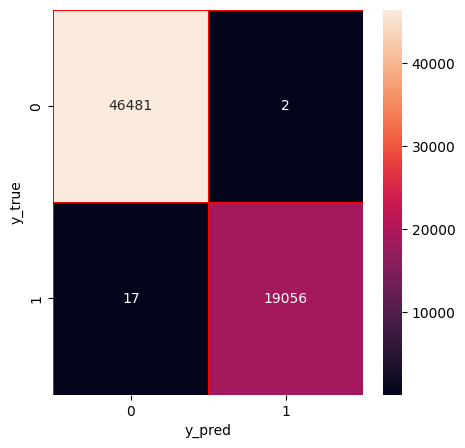

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_predict=model.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()